In [56]:
# INFORMAÇÃO BÁSICA DO DATASET
# de onde veio? quem fornceu? quando foi realizado?

url_dataset = "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer"

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [58]:
original_dataset = pd.read_csv('/home/eduardonunes/workspace/ml/breast_cancer_data.csv', sep=',', header=0)

original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
nodes-caps     286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [59]:
original_dataset.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [60]:
original_dataset.head()

,class,age,menopause,tumor-size,inv-nodes,nodes-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# EXPLICAÇÃO DE CADA DADO
 Informando quais o tipos que determinado atributo pode ter e um texto a respeito do que ele significa. Copiar dos artigos

# Entendendo melhor as relações dos dados(MELHORAR O TITULO)

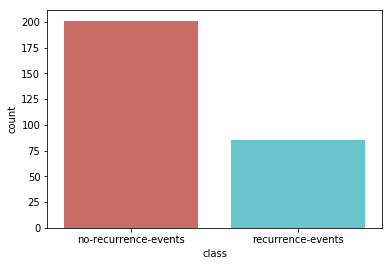

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64 

Percentage:  [70.27972028 29.72027972]


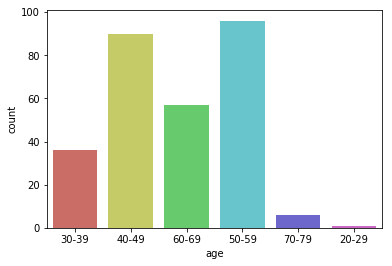

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64 

Percentage:  [33.56643357 31.46853147 19.93006993 12.58741259  2.0979021   0.34965035]


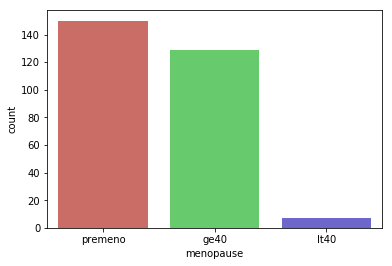

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64 

Percentage:  [52.44755245 45.1048951   2.44755245]


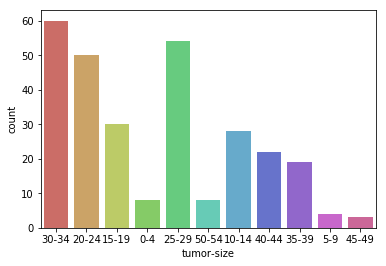

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: tumor-size, dtype: int64 

Percentage:  [20.97902098 18.88111888 17.48251748 10.48951049  9.79020979  7.69230769
  6.64335664  2.7972028   2.7972028   1.3986014   1.04895105]


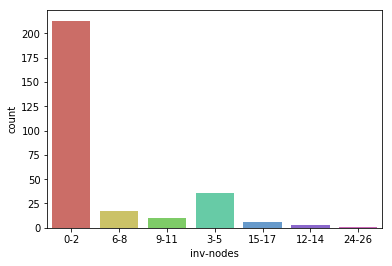

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64 

Percentage:  [74.47552448 12.58741259  5.94405594  3.4965035   2.0979021   1.04895105
  0.34965035]


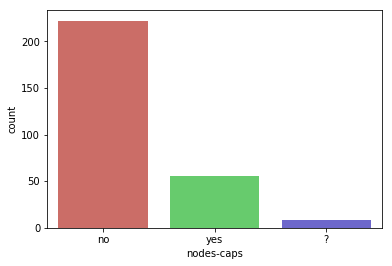

no     222
yes     56
?        8
Name: nodes-caps, dtype: int64 

Percentage:  [77.62237762 19.58041958  2.7972028 ]


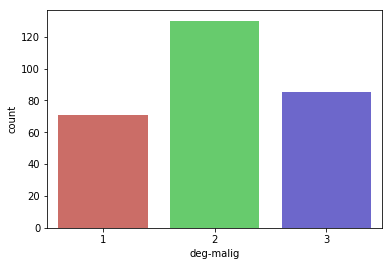

2    130
3     85
1     71
Name: deg-malig, dtype: int64 

Percentage:  [45.45454545 29.72027972 24.82517483]


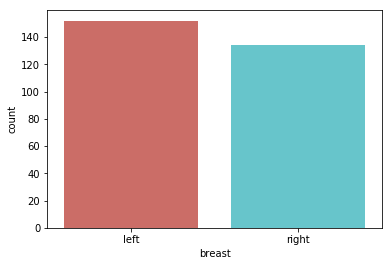

left     152
right    134
Name: breast, dtype: int64 

Percentage:  [53.14685315 46.85314685]


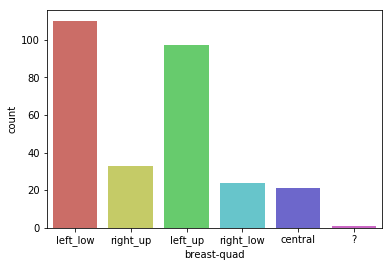

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64 

Percentage:  [38.46153846 33.91608392 11.53846154  8.39160839  7.34265734  0.34965035]


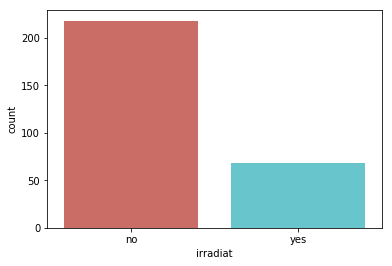

no     218
yes     68
Name: irradiat, dtype: int64 

Percentage:  [76.22377622 23.77622378]


In [61]:
def get_data_statistics():
    for column_head in original_dataset:
        sns.countplot(x = column_head, data=original_dataset, palette='hls')
        plt.show()
        
        statistics = original_dataset[column_head].value_counts()
        statistics_percentage = np.array(statistics)
        
        print(statistics, "\n\nPercentage: ", (statistics_percentage/286)*100)

get_data_statistics()

# Informações gerais sobre os dados (MELHORAR ISSO)
* Há maior quantidade de casos de não recorrência de eventos do que de recorrência. Totalizando 70.28% de no-recurrence-events.
* Há maior quantidade de ocorrências entre 40 e 59 anos. Totalizando 186 de pessoas o que é equivalente a 65%
* Há maior quantidade de ocorrências em mulheres que tenham idade igual ou superior a 40 anos. Totalizando 279 o que é equivalente a 97.56%.
* O tamanho mais reconte de tumor é de 20 à 34 mm. Totalizando 164 o que é equivalente à 57.30%


# Tratamento dos dados do dataset

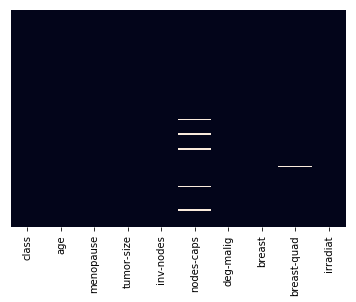

In [72]:
# Replace missing data: '?' for null value.
dataset = original_dataset.replace('?', np.nan)

sns.heatmap(dataset.isna(), cbar=False, yticklabels=False)

,class,age,menopause,tumor-size,inv-nodes,nodes-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


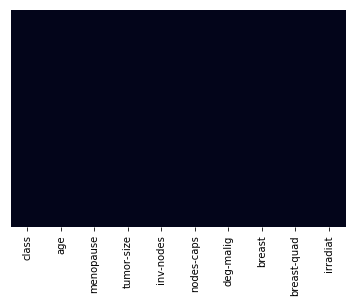

In [76]:
# Remove all nan elements
dataset = dataset.dropna()
sns.heatmap(dataset.isna(), cbar=False, yticklabels=False)

In [64]:
deleted_elements = len(original_dataset) - len(dataset)
print("\nDeleted elements: {}\nlen original dataset: {}\nlen new dataset: {}\n".format(deleted_elements,len(original_dataset), len(dataset)))


Deleted elements: 0
len original dataset: 286
len new dataset: 286



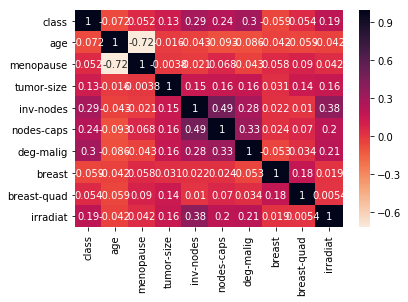

In [65]:
dataset_normalized = pd.DataFrame()

for att in dataset:
    if(att!="deg-malig"):
        dataset_normalized[att] = le.fit_transform(dataset[att].astype(str))
    else:
        dataset_normalized[att] = dataset[att]

sns.heatmap(dataset_normalized.corr(), annot=True, cmap=sns.cm.rocket_r)


In [66]:
dataset_normalized.head()

,class,age,menopause,tumor-size,inv-nodes,nodes-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,1,3,0,1,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,1,0
3,0,4,0,2,0,1,2,1,2,0
4,0,2,2,0,0,1,2,1,4,0
